In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:

# Order by n in site
cases = ['DUP22q11_2','DEL15q11_2','DUP1q21_1','DEL1q21_1','DUP16p11_2','DEL16p11_2','DEL22q11_2','ADHD','ASD','SZ','BIP']
case_labels =       ['BIP                  n=44',
                    'SZ                   n=283',
                    'ASD                 n=472',
                    'ADHD              n=223',

                    'DEL 22q11.2     n=43',
                    'DEL 16p11.2      n=32',
                    
                    'DUP 16p11.2     n=35',
                    'DEL 1q21.1       n=25',
                    'DUP 1q21.1       n=19',
                    'DEL 15q11.2    n=103',
                    'DUP 22q11.2     n=22']
case_labels.reverse()

p_baseline = '../../results_reviews/baseline/mlp'
p_mtl = '../../results_reviews/mtl/mlp'

# Load Data

In [37]:
# Single Task

st_data = []
for case in cases:
    folds = []
    for fold in range(5):
        p_parent = os.path.join(p_baseline, f"{case}/fold_{fold}")
        file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
        df = pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1])[case]
        folds.append(df['Accuracy/test'].iloc[-1])
    st_data.append(folds)

st_data = dict(zip(cases,st_data))

In [38]:
df_st = pd.DataFrame(st_data)
df_st['type'] = 'baseline'
df_st

,DUP22q11_2,DEL15q11_2,DUP1q21_1,DEL1q21_1,DUP16p11_2,DEL16p11_2,DEL22q11_2,ADHD,ASD,SZ,BIP,type
0,44.444444,52.380952,75.000000,50.0,71.428571,76.923077,72.222222,60.344828,62.433862,73.437500,75.000000,baseline
1,33.333333,53.658537,12.500000,70.0,71.428571,53.846154,88.235294,61.739130,59.788360,73.437500,78.125000,baseline
2,44.444444,56.097561,50.000000,80.0,64.285714,92.307692,100.000000,55.652174,63.492063,73.437500,80.645161,baseline
3,22.222222,58.536585,57.142857,90.0,71.428571,69.230769,88.235294,47.826087,66.489362,78.740157,80.645161,baseline
4,62.500000,56.097561,71.428571,50.0,64.285714,66.666667,70.588235,55.652174,64.361702,81.889764,80.645161,baseline


In [39]:
# Multi-task

mtl_data = []
for fold in range(5):
    p_parent = os.path.join(p_mtl, f"fold_{fold}")
    file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
    df = pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1])
    acc = []
    for case in cases:
        acc.append(df[case]['Accuracy/test'].iloc[-1])
    mtl_data.append(acc)



In [40]:
df_mtl = pd.DataFrame(mtl_data,index=range(5),columns=cases)
df_mtl['type'] = 'mtl'
df_mtl

,DUP22q11_2,DEL15q11_2,DUP1q21_1,DEL1q21_1,DUP16p11_2,DEL16p11_2,DEL22q11_2,ADHD,ASD,SZ,BIP,type
0,55.555556,54.761905,62.500000,50.0,71.428571,69.230769,72.222222,62.068966,53.439153,72.656250,81.250000,mtl
1,44.444444,60.975610,37.500000,50.0,50.000000,53.846154,58.823529,53.913043,59.259259,69.531250,81.250000,mtl
2,77.777778,53.658537,25.000000,60.0,71.428571,69.230769,88.235294,50.434783,61.904762,76.562500,90.322581,mtl
3,22.222222,68.292683,57.142857,90.0,50.000000,61.538462,76.470588,59.130435,59.574468,75.590551,80.645161,mtl
4,62.500000,43.902439,42.857143,40.0,50.000000,75.000000,58.823529,56.521739,62.765957,78.740157,87.096774,mtl


In [41]:
df_master = pd.concat([df_mtl,df_st])
df_master

,DUP22q11_2,DEL15q11_2,DUP1q21_1,DEL1q21_1,DUP16p11_2,DEL16p11_2,DEL22q11_2,ADHD,ASD,SZ,BIP,type
0,55.555556,54.761905,62.500000,50.0,71.428571,69.230769,72.222222,62.068966,53.439153,72.656250,81.250000,mtl
1,44.444444,60.975610,37.500000,50.0,50.000000,53.846154,58.823529,53.913043,59.259259,69.531250,81.250000,mtl
2,77.777778,53.658537,25.000000,60.0,71.428571,69.230769,88.235294,50.434783,61.904762,76.562500,90.322581,mtl
3,22.222222,68.292683,57.142857,90.0,50.000000,61.538462,76.470588,59.130435,59.574468,75.590551,80.645161,mtl
4,62.500000,43.902439,42.857143,40.0,50.000000,75.000000,58.823529,56.521739,62.765957,78.740157,87.096774,mtl
0,44.444444,52.380952,75.000000,50.0,71.428571,76.923077,72.222222,60.344828,62.433862,73.437500,75.000000,baseline
1,33.333333,53.658537,12.500000,70.0,71.428571,53.846154,88.235294,61.739130,59.788360,73.437500,78.125000,baseline
2,44.444444,56.097561,50.000000,80.0,64.285714,92.307692,100.000000,55.652174,63.492063,73.437500,80.645161,baseline
3,22.222222,58.536585,57.142857,90.0,71.428571,69.230769,88.235294,47.826087,66.489362,78.740157,80.645161,baseline
4,62.500000,56.097561,71.428571,50.0,64.285714,66.666667,70.588235,55.652174,64.361702,81.889764,80.645161,baseline


# Plots

/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_37390/3207096819.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels([None,None])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_37390/3207096819.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels([None,None])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_37390/3207096819.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels([None,None])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_37390/3207096819.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels([None,None])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_37390/3207096819.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels([None,None])
/var/folders/5x/9dwn0lbx6

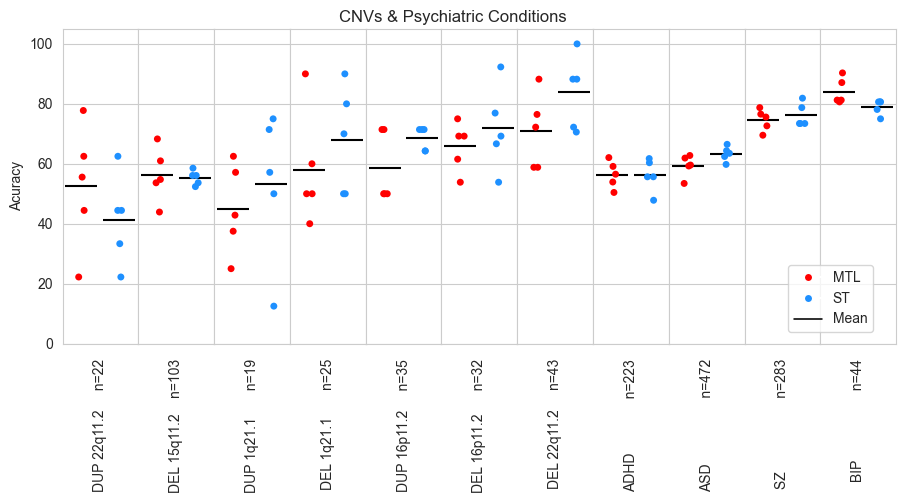

In [44]:
colors = ['black','darkorchid','red','orange','dodgerblue','forestgreen']
colors = ['red','dodgerblue']
sns.set_style('whitegrid')

fig,ax = plt.subplots(1,11,figsize=(9,5),sharey=True)
for i, case in enumerate(cases):
    sns.stripplot(data=df_master, x='type',y=case,hue='type',ax=ax[i],legend=False,palette=colors)
    ax[i].scatter('mtl',df_master[df_master['type']=='mtl'][case].mean(),color='black',marker='_',sizes=[500])
    ax[i].scatter('baseline',df_master[df_master['type']=='baseline'][case].mean(),color='black',marker='_',sizes=[500])
    ax[i].set_xticklabels([None,None])
    ax[i].set_xlabel(case_labels[i],rotation=90)
    ax[i].set_xlim(-0.5,1.5)
ax[0].set_ylabel('Acuracy')

from matplotlib.lines import Line2D
handles = [Line2D([0], [0], marker='o',color='w', label='MTL',
                          markerfacecolor=colors[0]),
        Line2D([0], [0], marker='o', color='w', label='ST',
                          markerfacecolor=colors[1]),
        Line2D([0], [0], color='black', label='Mean',
                           linewidth=1.15,ls='-')
                          ]
labels = ['MTL','ST','Mean']
fig.legend(handles, labels, loc=(0.87,0.34))

plt.suptitle ('CNVs & Psychiatric Conditions')
plt.ylim(0,105)
plt.tight_layout(pad=0.5)
plt.subplots_adjust(wspace=0)
plt.savefig(os.path.join('./figures/acc_distribution.png'),dpi=300)